# Gun Violence EDA
### MySQL / python


In [49]:
#Read data
import os
import pandas as pd
cwd = os.getcwd()
gun_dir = os.path.join(cwd,'data','gun_violence_archive')
print(gun_dir)

/Users/hyunjoonrhee/GitHub/Practice/data/gun_violence_archive


In [50]:
all_cases = pd.read_csv(os.path.join(gun_dir,'all_incidents.csv'))
mass_cases = pd.read_csv(os.path.join(gun_dir,'mass_shootings.csv'))
cases_2018 = pd.read_csv(os.path.join(gun_dir,'gun-violence-data_01-2013_03-2018.csv'))

In [51]:
#print column methods using list & keys
cases_2018.keys()

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [122]:
print(list(all_cases))
print(list(mass_cases))

['incident_id', 'date', 'state', 'city', 'address', 'n_killed', 'n_injured']
['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address', '# Killed', '# Injured']


In [53]:
mass_cases['Incident Date'] = pd.to_datetime(mass_cases['Incident Date']).dt.strftime('%Y-%m-%d')

In [54]:
print('Number of Mass Shootings :  ' + str(len(mass_cases)))

# Check for duplicate id_numbers
duplicate_id_numbers = all_cases[all_cases['incident_id'].isin(mass_cases['Incident ID'])]

# Print the duplicate id_numbers 
print('Number of duplicate ids of mass_shootings and all_incidents table : ' + str(len(duplicate_id_numbers['incident_id'])))
print('This indicates that all mass shootings are included in the all_incidents table')



Number of Mass Shootings :  3609
Number of duplicate ids of mass_shootings and all_incidents table : 3609
This indicates that all mass shootings are included in the all_incidents table


In [56]:
from sqlalchemy import create_engine

host="localhost"
user="root"
password="Dlguswns0926!"
database_name='GunViolence'
# Create a MySQL database engine
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database_name}')
con = engine.connect()

In [57]:
'''
import sqlite3
con = sqlite3.connect(os.path.join(gun_dir,'gfg.db'))
cursor = con.con()
print('Connected to the database!' + ' To close connection use .close()')

#sqliteconnection.close()
#--> to close connection
'''

"\nimport sqlite3\ncon = sqlite3.connect(os.path.join(gun_dir,'gfg.db'))\ncursor = con.con()\nprint('Connected to the database!' + ' To close connection use .close()')\n\n#sqliteconnection.close()\n#--> to close connection\n"

In [67]:
#import csv to sql
all_cases.to_sql('all_incidents',con, if_exists='replace',index=False)
mass_cases.to_sql('mass_shootings',con, if_exists='replace',index=False)

3609

In [68]:
import sqlalchemy

sql = sqlalchemy.text("SELECT * FROM all_incidents")
pd.read_sql_query(sql, con)

,incident_id,date,state,city,address,n_killed,n_injured
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0
...,...,...,...,...,...,...,...
472815,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2
472816,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0
472817,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3
472818,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3


In [69]:
sql = sqlalchemy.text("SELECT * FROM mass_shootings")
pd.read_sql_query(sql, con)

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured
0,271363,2014-12-29,Louisiana,New Orleans,Poydras and Bolivar,0,4
1,269679,2014-12-27,California,Los Angeles,8800 block of South Figueroa Street,1,3
2,270036,2014-12-27,California,Sacramento,4000 block of May Street,0,4
3,269167,2014-12-26,Illinois,East St. Louis,2500 block of Summit Avenue,1,3
4,268598,2014-12-24,Missouri,Saint Louis,18th and Pine,1,3
...,...,...,...,...,...,...,...
3604,274867,2015-01-06,Florida,Miami,1300 block of NW 62nd Street,1,3
3605,273535,2015-01-04,Virginia,Roanoke,3634 Shenandoah Ave NW,2,4
3606,273397,2015-01-04,Texas,Dallas,2000 block of Ben Hur St.,3,1
3607,273965,2015-01-02,Georgia,Savannah,500 block of W. 54th Street,1,4


In [70]:
def sqltext(query):
    return sqlalchemy.text(query)
sql = sqlalchemy.text("ALTER TABLE mass_shootings CHANGE COLUMN `Incident ID` incident_id VARCHAR(255) NOT NULL;")
con.execute(sql)
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `Incident Date` TO date;"))

In [71]:
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `State` TO state;"))
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `City Or County` TO city;"))
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `Address` TO address;"))
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `# Killed` TO n_killed;"))
con.execute(sqltext("ALTER TABLE mass_shootings RENAME COLUMN `# Injured` TO n_injured;"))
pd.read_sql_query(sqltext("SELECT * FROM mass_shootings"), con)

,incident_id,date,state,city,address,n_killed,n_injured
0,271363,2014-12-29,Louisiana,New Orleans,Poydras and Bolivar,0,4
1,269679,2014-12-27,California,Los Angeles,8800 block of South Figueroa Street,1,3
2,270036,2014-12-27,California,Sacramento,4000 block of May Street,0,4
3,269167,2014-12-26,Illinois,East St. Louis,2500 block of Summit Avenue,1,3
4,268598,2014-12-24,Missouri,Saint Louis,18th and Pine,1,3
...,...,...,...,...,...,...,...
3604,274867,2015-01-06,Florida,Miami,1300 block of NW 62nd Street,1,3
3605,273535,2015-01-04,Virginia,Roanoke,3634 Shenandoah Ave NW,2,4
3606,273397,2015-01-04,Texas,Dallas,2000 block of Ben Hur St.,3,1
3607,273965,2015-01-02,Georgia,Savannah,500 block of W. 54th Street,1,4


In [72]:
#check if there are duplicate incident id in two tables
query = sqltext('''
SELECT incident_id
FROM all_incidents
WHERE EXISTS (
    SELECT *
    FROM mass_shootings
    WHERE all_incidents.incident_id = mass_shootings.incident_id
)
''')
result = con.execute(query)
duplicate_rows = result.fetchall()

In [80]:
query = sqltext('''
CREATE TABLE If NOT EXISTS top_15_states AS
SELECT state, COUNT(*) AS frequency
FROM all_incidents
GROUP BY state
ORDER BY frequency DESC
LIMIT 15
''')
con.execute(query)
result = con.execute(sqltext('SELECT * FROM top_15_states;'))
top15states = result.fetchall()

In [81]:
query = sqltext('''
CREATE TABLE IF NOT EXISTS top_30_cities AS
SELECT city, COUNT(*) AS frequency
FROM all_incidents
GROUP BY city
ORDER BY frequency DESC
LIMIT 30
''')
con.execute(query)
result = con.execute(sqltext('SELECT * FROM top_15_states;'))
top30cities = result.fetchall()

In [76]:
con.execute(sqltext("ALTER TABLE top_15_states RENAME COLUMN frequency TO incidents;"))
con.execute(sqltext("ALTER TABLE top_30_cities RENAME COLUMN frequency TO incidents;"))

In [77]:
top_15_states = pd.read_sql_query(sqltext("SELECT * FROM top_15_states"), con)
top_30_cities = pd.read_sql_query(sqltext("SELECT * FROM top_30_cities"), con)

In [82]:
#Gun violence number by year
query = sqltext('''
CREATE TABLE IF NOT EXISTS shots_year AS
SELECT DATE_FORMAT(date, '%Y') AS year, COUNT(*) AS incidents
FROM all_incidents
GROUP BY year
ORDER BY year
''')
con.execute(query)

In [83]:
shots_per_year = pd.read_sql_query(sqltext('SELECT * FROM shots_year'), con)

In [84]:
query = sqltext('''
CREATE TABLE IF NOT EXISTS mass_year AS
SELECT DATE_FORMAT(date, '%Y') AS year, COUNT(*) AS incidents
FROM mass_shootings
GROUP BY year
ORDER BY year
''')
con.execute(query)
massshot_peryear = pd.read_sql_query(sqltext('SELECT * FROM mass_year'),con)

#### Number of gun violence incidents per year

Text(0.5, 1.0, 'Number of gun violence incidents per year')

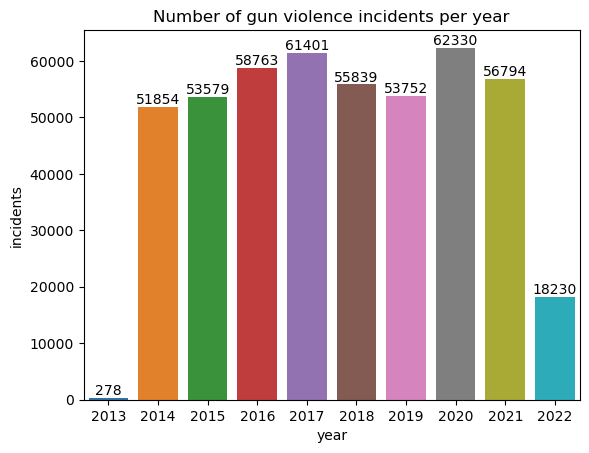

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data = shots_per_year,x = 'year', y = 'incidents')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.title('Number of gun violence incidents per year')

#### Number of mass shooting incidents per year

Text(0.5, 1.0, 'Number of mass shooting incidents per year')

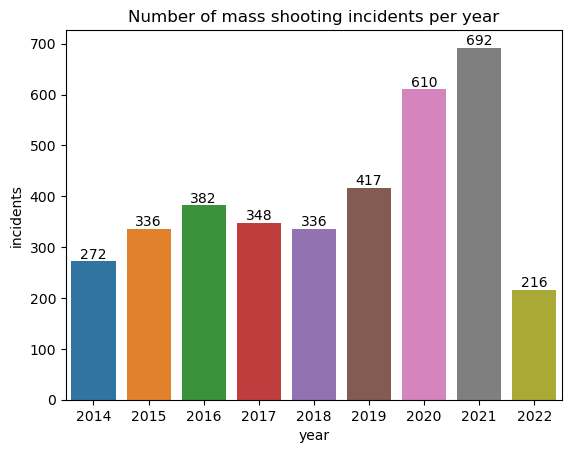

In [103]:
sns.barplot(data = massshot_peryear,x = 'year', y = 'incidents')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.title('Number of mass shooting incidents per year')

In [124]:
from datetime import datetime
all_cases['date'] = pd.to_datetime(all_cases['date'])
all_cases['year'] = all_cases['date'].dt.year
all_cases['month'] = all_cases['date'].dt.month
all_cases['monthday'] = all_cases['date'].dt.day
all_cases['weekday'] = all_cases['date'].dt.weekday
all_cases['loss'] = all_cases['n_killed'] + all_cases['n_injured']

In [9]:
import calendar
tempall_cases = all_cases.groupby(['year','month']).agg({'month' : 'count'}).rename(columns={'month':'month_count'}).reset_index()
aggregated = tempall_cases.groupby(['month']).agg({'month_count':'mean'})
x1 = aggregated.index.tolist()
y1 = aggregated.month_count.tolist()
mapp = {}
for m,v in zip(x1,y1):
    mapp[m] = v
x2 = [calendar.month_abbr[int(x)] for x in sorted(x1)]
v2 = [mapp[x] for x in sorted(x1)]

#### Shootings per month (2013 ~ 2022)

Text(0.5, 1.0, 'Shootings per month (2013~2022)')

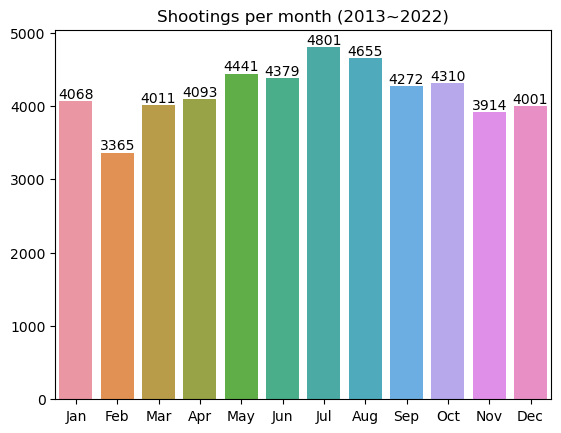

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = x2, y = v2)
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.title('Shootings per month (2013~2022)')

#### Average Number of shooting by day

In [125]:
tempall_cases1 = all_cases.groupby(['year', 'weekday']).agg({'weekday' : 'count'}).rename(columns={'weekday' : 'weekday_count'}).reset_index()
aggregated = tempall_cases1.groupby(['weekday']).agg({'weekday_count' : 'mean'})

xtmp = aggregated.index.tolist()
ytmp = aggregated.weekday_count.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
xtmp = [weekmap[x] for x in xtmp]
wkmp = {}
for j,x in enumerate(xtmp):
    wkmp[x] = ytmp[j]
order = list(weekmap.values())
ordervals = [wkmp[val] for val in order]

Text(0.5, 1.0, 'Average number of shooting by day')

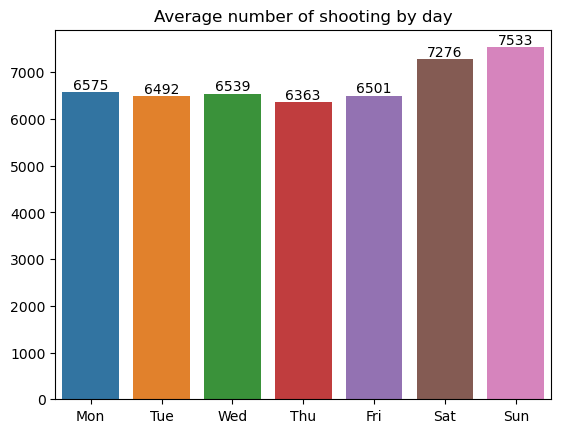

In [24]:
sns.barplot(x = order, y = ordervals)
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.title('Average number of shooting by day')

#### Top 3 Shooting years by the data: 2019,2020,2021 (data is from 2013 ~ 2022)

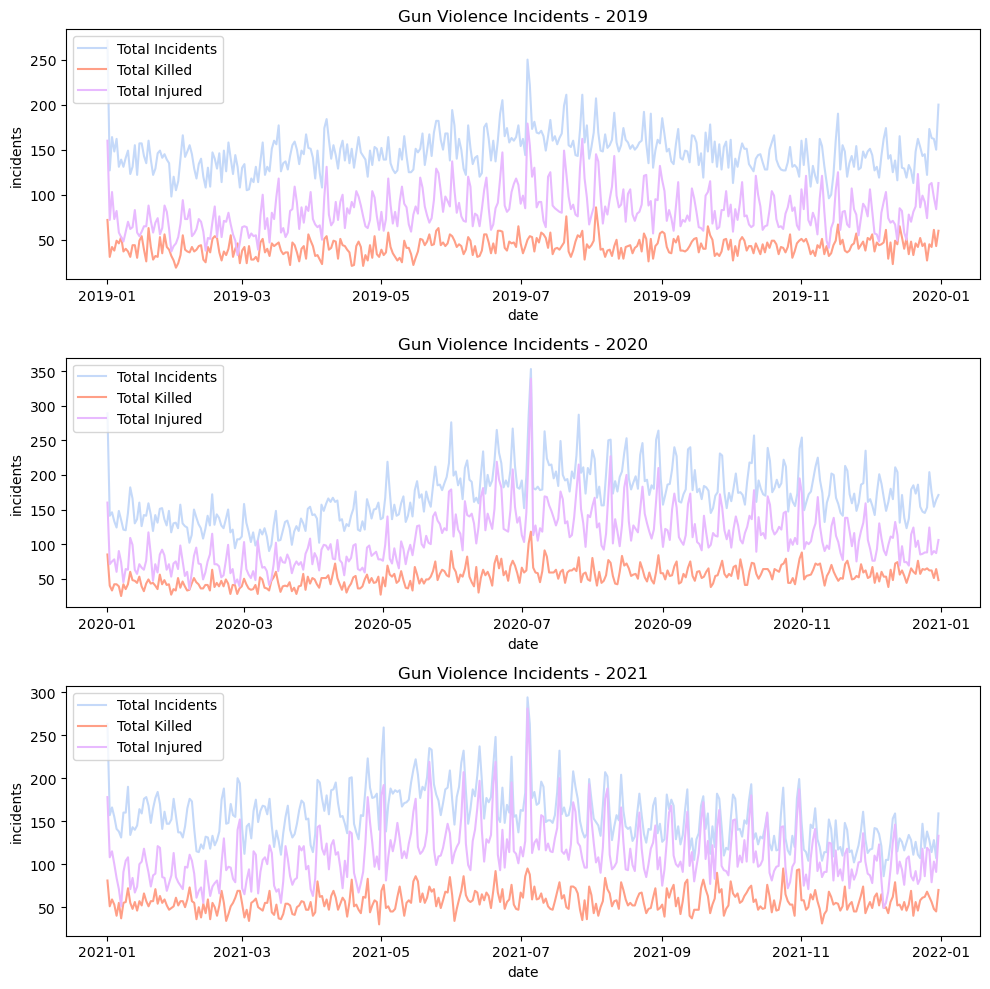

In [32]:
def preprocess_data_for_year(year):
    return all_cases[all_cases['year'] == year].groupby('date').agg({
        'state' : 'count', 
        'n_killed' : 'sum', 
        'n_injured' : 'sum'
    }).reset_index().rename(columns={'state' : 'incidents'})

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

years = [2019, 2020, 2021]
colors = ['#c5d9f9', '#ff9f87', '#e8baff']

# Loop through years and plot on respective axis
for ax, year in zip(axes, years):
    temp = preprocess_data_for_year(year)

    sns.lineplot(x=temp.date, y=temp.incidents, label='Total Incidents', color=colors[0], ax=ax)
    sns.lineplot(x=temp.date, y=temp.n_killed, label='Total Killed', color=colors[1], ax=ax)
    sns.lineplot(x=temp.date, y=temp.n_injured, label='Total Injured', color=colors[2], ax=ax)
    
    ax.set_title(f'Gun Violence Incidents - {year}')
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [36]:
filtered_data_2019 = all_cases[(all_cases['year'] == 2019) & (all_cases['date'] == '2019-07-04')]
incident_count_2019 = filtered_data_2019.shape[0]
total_killed_2019 = filtered_data_2019['n_killed'].sum()
total_injured_2019 = filtered_data_2019['n_injured'].sum()
filtered_data_2020 = all_cases[(all_cases['year'] == 2020) & (all_cases['date'] == '2020-07-04')]
incident_count_2020 = filtered_data_2020.shape[0]
total_killed_2020 = filtered_data_2020['n_killed'].sum()
total_injured_2020 = filtered_data_2020['n_injured'].sum()
filtered_data_2021 = all_cases[(all_cases['year'] == 2021) & (all_cases['date'] == '2021-07-04')]
incident_count_2021 = filtered_data_2021.shape[0]
total_killed_2021 = filtered_data_2021['n_killed'].sum()
total_injured_2021 = filtered_data_2021['n_injured'].sum()
print(f"Number of total incidents on July 4th, 2019: {incident_count_2019}")
print(f"Number of total incidents on July 4th, 2020: {incident_count_2020}")
print(f"Number of total incidents on July 4th, 2021: {incident_count_2021}\n")

print(f"Number of total killed on July 4th, 2019: {total_killed_2019}")
print(f"Number of total killed on July 4th, 2020: {total_killed_2020}")
print(f"Number of total killed on July 4th, 2021: {total_killed_2021}\n")

print(f"Number of total injured on July 4th, 2019: {total_injured_2019}")
print(f"Number of total injured on July 4th, 2020: {total_injured_2020}")
print(f"Number of total injured on July 4th, 2021: {total_injured_2021}")

Number of total incidents on July 4th, 2019: 250
Number of total incidents on July 4th, 2020: 286
Number of total incidents on July 4th, 2021: 294

Number of total killed on July 4th, 2019: 50
Number of total killed on July 4th, 2020: 101
Number of total killed on July 4th, 2021: 95

Number of total injured on July 4th, 2019: 179
Number of total injured on July 4th, 2020: 232
Number of total injured on July 4th, 2021: 281


In [37]:
states_all_cases = all_cases['state'].value_counts()

statesall_cases = pd.DataFrame()
statesall_cases['state'] = states_all_cases.index
statesall_cases['counts'] = states_all_cases.values

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesall_cases['state_code'] = statesall_cases['state'].apply(lambda x : state_to_code[x])

#### Geopandas Gun Violence prevalent states with Map(Alaska is not included)

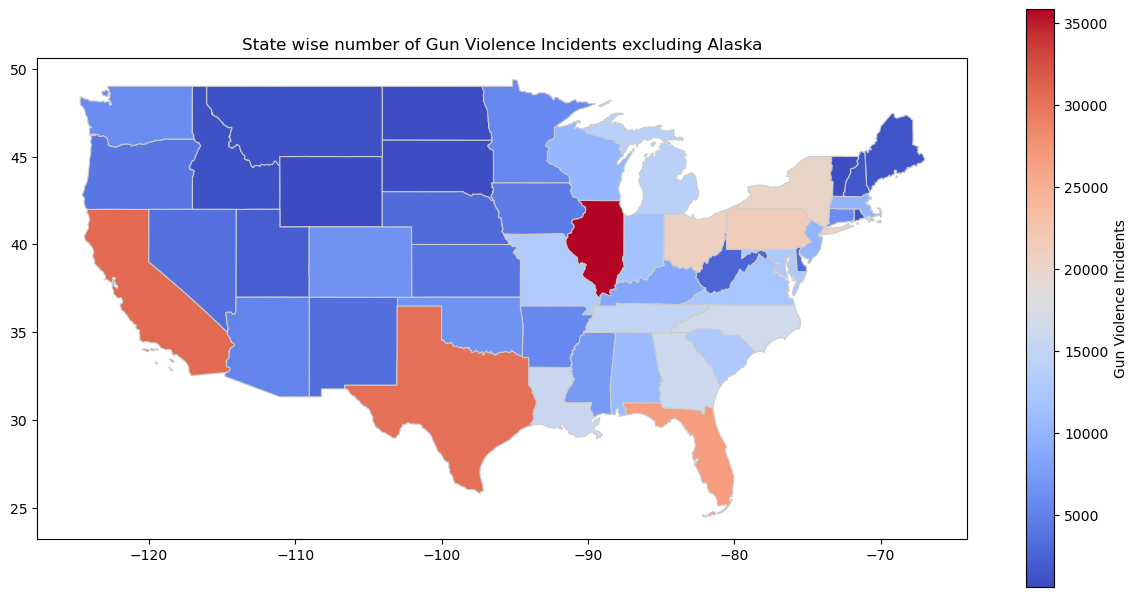

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Download and read the shapefile directly
url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip"
usa = gpd.read_file(url)

# Filter out Alaska (and optionally Hawaii if desired)
usa = usa[~usa['STUSPS'].isin(['AK', 'HI'])]  # Excludes both Alaska and Hawaii

# Then continue with the merging and plotting as before...
merged = usa.set_index('STUSPS').join(statesall_cases.set_index('state_code'))

fig, ax = plt.subplots(1, 1, figsize=(15, 25))

merged_map = merged.plot(column='counts', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

colorbar = ax.get_figure().colorbar(merged_map.collections[0], ax=ax, shrink=0.3)
colorbar.set_label('Gun Violence Incidents')

ax.set_title('State wise number of Gun Violence Incidents excluding Alaska')
plt.show()


#### Number of gun violences by US States

"\nfor p in plt.gca().patches:\n    height = int(p.get_height())  # Format the height as an integer\n    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),\n                       ha='center', va='bottom', rotation=45)\n"

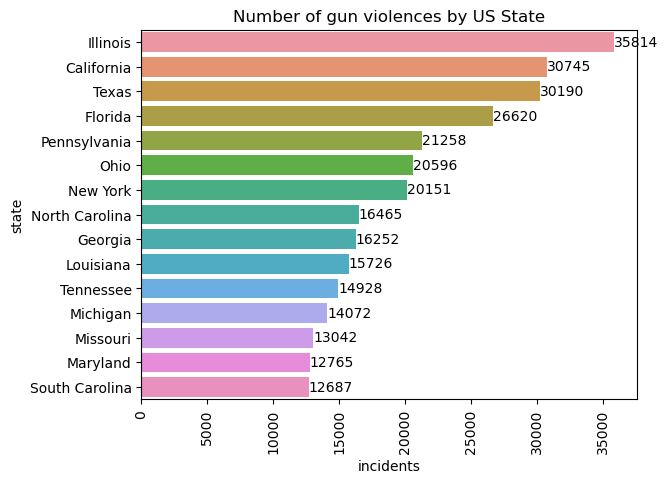

<Figure size 6000x3000 with 0 Axes>

In [90]:
sns.barplot(data = top_15_states, y = 'state', x = 'incidents')
for p in plt.gca().patches:
    width = p.get_width()  # For horizontal bars, use width instead of height
    plt.gca().annotate(f'{int(width)}', 
                       (width, p.get_y() + p.get_height() / 2), 
                       ha='left', va='center')  # Adjust alignment
plt.xticks(rotation = 90)
plt.title('Number of gun violences by US State')
plt.figure(figsize=(60,30))

'''
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', rotation=45)
'''

#### Number of gun violences by US cities

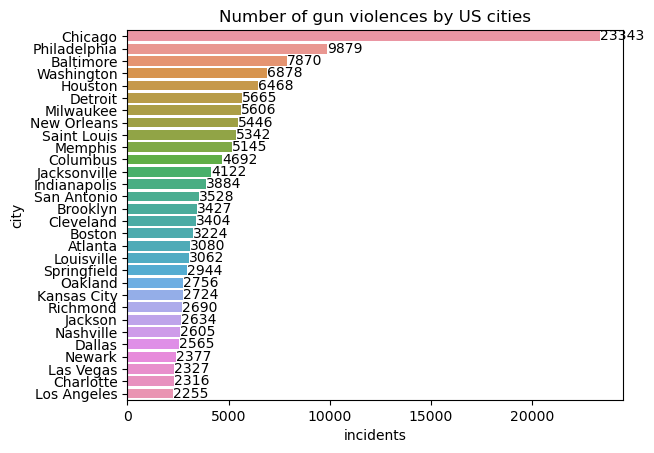

In [88]:
sns.barplot(data = top_30_cities, y = 'city', x = 'incidents')
for p in plt.gca().patches:
    width = p.get_width()  # For horizontal bars, use width instead of height
    plt.gca().annotate(f'{int(width)}', 
                       (width, p.get_y() + p.get_height() / 2), 
                       ha='left', va='center')  # Adjust alignment
plt.title('Number of gun violences by US cities')
plt.show()

In [102]:
cases_2018.keys()

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'n_guns'],
      dtype='object')

#### Number of people killed marked in US map (larger dot, higher number of people killed)

In [106]:
import folium
smallall_cases = cases_2018[cases_2018['n_killed'] >= 3][['latitude', 'longitude', 'n_killed']].dropna()
map1 = folium.Map(location=[39.50, -98.35], tiles='CartoDB dark_matter', zoom_start=3.5)
map2 = folium.Map([39.50, -98.35], zoom_start=3.5, tiles='cartodbdark_matter')
markers = []
for i, row in smallall_cases.iterrows():
    loss = row['n_killed']
    if row['n_killed'] > 100:
        loss = row['n_killed']*0.1    
    folium.CircleMarker([float(row['latitude']), float(row['longitude'])], radius=float(loss), color='#ef4f61', fill=True).add_to(map1)

map1

In [118]:
victim_age_groups = {}
for i, row in cases_2018.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            ag = row['participant_age_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1

#### Victim's Age Distribution

/var/folders/m6/_674l8815692m04rgcb9n31h0000gn/T/ipykernel_34568/3520622604.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




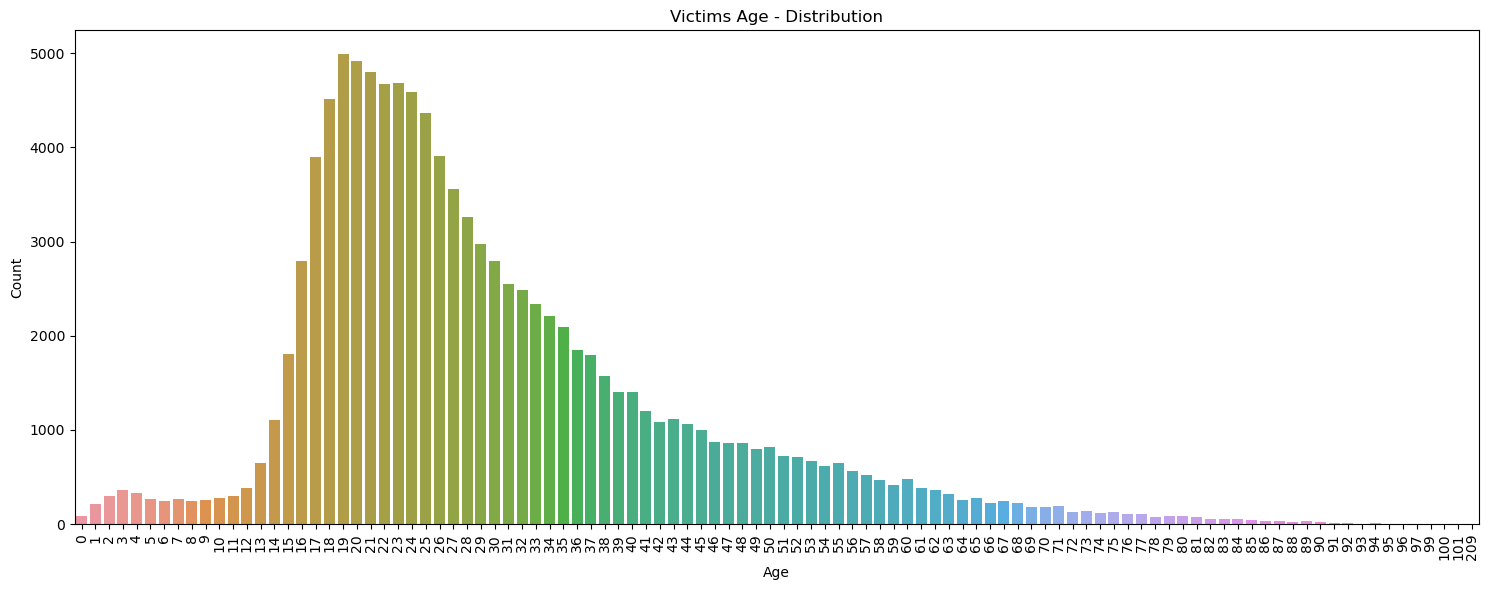

In [127]:
victim_df = pd.DataFrame(list(victim_age_groups.items()), columns=['Age', 'Count'])

# Ensure the Age is treated as a category
victim_df['Age'] = pd.to_numeric(victim_df['Age'], errors='coerce')  # Convert non-numeric entries to NaN
victim_df = victim_df.dropna(subset=['Age'])  # Drop NaN values
victim_df['Age'] = victim_df['Age'].astype(int)  # Convert Age back to int
victim_df = victim_df.sort_values('Age')

# Plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='Age', y='Count', data=victim_df, ci=None)
plt.title('Victims Age - Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This shows highest in range of 16 ~ 30

Democratic vs Republican State by https://wisevoter.com/state-rankings/red-and-blue-states/

Republican States
1. Alabama
2. Alaska
3. Arkansas
4. Idaho
5. Indiana
6. Iowa
7. Kansas
8. Kentucky
9. Louisiana
10. Mississippi
11. Missouri
12. Montana
13. Nebraska
14. North Dakota
15. Oklahoma
16. South Carolina
17. South Dakota
18. Tennessee
19. Texas
20. Utah
21. West Virginia
22. Wyoming

Democratic States
1. California
2. Colorado
3. Connecticut
4. Delaware
5. District of Columbia
6. Hawaii
7. Illinois
8. Maine
9. Maryland
10. Massachusetts
11. New Hampshire
12. New Jersey
13. New Mexico
14. New York
15. Oregon
16. Rhode Island
17. Vermont
18. Virginia
19. Washington

In [ ]:
'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois', 'Maine',
'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington'

In [107]:
query1 = sqltext('''
ALTER TABLE all_incidents
ADD COLUMN `Dem/Rep` VARCHAR(3);
''')
query2 = sqltext('''
UPDATE all_incidents
SET `Dem/Rep` = CASE
    WHEN state IN ('California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois', 'Maine',
'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington') THEN 'Dem'
    ELSE 'Rep'
END;
''')
con.execute(query1)
con.execute(query2)

In [108]:
query1 = sqltext('''
ALTER TABLE mass_shootings
ADD COLUMN `Dem/Rep` VARCHAR(3);
''')
query2 = sqltext('''
UPDATE mass_shootings
SET `Dem/Rep` = CASE
    WHEN state IN ('California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois', 'Maine',
'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington') THEN 'Dem'
    ELSE 'Rep'
END;
''')
con.execute(query1)
con.execute(query2)

In [110]:
query1 = sqltext('''ALTER TABLE all_incidents RENAME COLUMN `Dem/Rep` TO Dem_Rep''')
query2 = sqltext('''ALTER TABLE mass_shootings RENAME COLUMN `Dem/Rep` TO Dem_Rep''')
con.execute(query1)
con.execute(query2)

In [111]:
pd.read_sql_query(sqltext('SELECT * FROM all_incidents'),con)

,incident_id,date,state,city,address,n_killed,n_injured,Dem_Rep
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,Rep
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,Dem
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,Rep
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,Rep
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,Dem
...,...,...,...,...,...,...,...,...
472815,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,Rep
472816,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,Dem
472817,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,Rep
472818,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,Dem


In [112]:
query = sqltext('''
CREATE TABLE politic_all AS
SELECT Dem_Rep, SUM(n_killed) AS killed, SUM(n_injured) AS injured, COUNT(*) AS incidents
FROM all_incidents
GROUP BY Dem_Rep
ORDER BY incidents DESC
''')
con.execute(query)

In [113]:
query = sqltext('''
CREATE TABLE politic_mass AS
SELECT Dem_Rep, SUM(n_killed) AS killed, SUM(n_injured) AS injured, COUNT(*) AS incidents
FROM mass_shootings
GROUP BY Dem_Rep
ORDER BY incidents DESC
''')
con.execute(query)

In [114]:
pol_all = pd.read_sql_query(sqltext('SELECT * FROM politic_all'),con)
mass_all = pd.read_sql_query(sqltext('SELECT * FROM politic_mass'),con)
pol_all = pol_all.melt(id_vars='Dem_Rep')
mass_all = mass_all.melt(id_vars='Dem_Rep')

<Figure size 4000x2500 with 0 Axes>

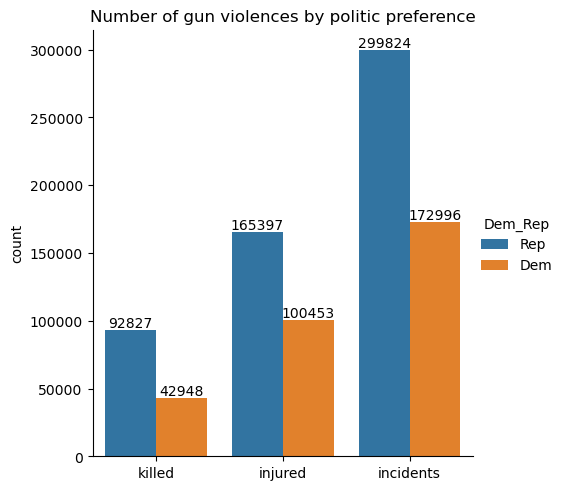

<Figure size 4000x2500 with 0 Axes>

In [115]:
plt.figure(figsize=(15,10))
sns.catplot(data=pol_all, x = 'variable', y = 'value', hue='Dem_Rep',kind='bar')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', rotation=0)
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('count')
plt.title('Number of gun violences by politic preference')

<Figure size 4000x2500 with 0 Axes>

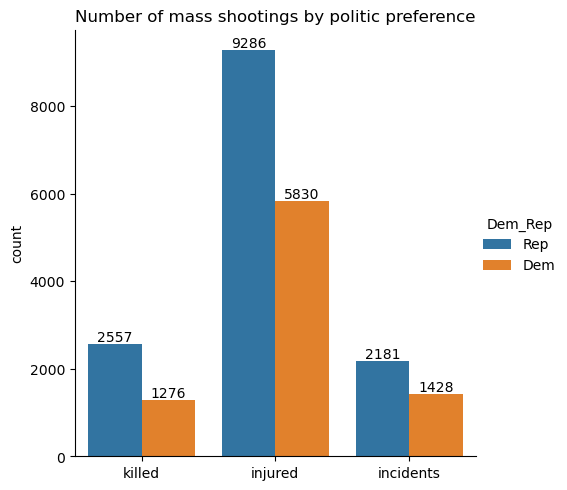

<Figure size 4000x2500 with 0 Axes>

In [116]:
plt.figure(figsize=(15,10))
sns.catplot(data=mass_all, x = 'variable', y = 'value', hue='Dem_Rep',kind='bar')
for p in plt.gca().patches:
    height = int(p.get_height())  # Format the height as an integer
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', rotation=0)
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('count')
plt.title('Number of mass shootings by politic preference')

State Firearm Laws in 2020: https://mail.statefirearmlaws.org/state-state-firearm-law-data

In [131]:
laws_2020 = {'Illinois': 65, 'New York': 75, 'Massachusetts': 103, 'Mississippi': 2, 'Oklahoma': 9, 'Delaware': 42, 'Minnesota': 41, 'Arkansas': 11, 'New Mexico': 10, 'Ohio': 15, 'Indiana': 12, 'Maryland': 70, 'Louisiana': 20, 'Texas': 18, 'Wyoming': 5, 'Tennessee': 22, 'Arizona': 8, 'Wisconsin': 23, 'Michigan': 21, 'Kansas': 7, 'Utah': 15, 'Virginia': 13, 'Oregon': 38, 'Connecticut': 92, 'Montana': 4, 'California': 107, 'Idaho': 1, 'West Virginia': 18, 'South Carolina': 12, 'New Hampshire': 9, 'Vermont': 20, 'Georgia': 6, 'North Dakota': 10, 'Pennsylvania': 37, 'Florida': 30, 'Alaska': 3, 'Kentucky': 7, 'Hawaii': 81, 'Nebraska': 22, 'Missouri': 2, 'Iowa': 24, 'Alabama': 10, 'Rhode Island': 54, 'South Dakota': 6, 'Colorado': 30, 'New Jersey': 78, 'Washington': 43, 'North Carolina': 30, 'Nevada': 21, 'Maine': 11}
y1 = []
x1 = []
for x, y in laws_2020.items():
    y1.append(y)
    x1.append(x)

In [159]:
df = pd.DataFrame({'State': x1, 
                   'Values': y1, 
                   'Label': ['2020']*len(x1)})
df_grouped = df.groupby('State').sum().sort_values(by='Values', ascending=False).reset_index()

In [163]:
dem_list = ['California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Hawaii', 'Illinois', 'Maine',
'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
'Oregon', 'Rhode Island', 'Vermont', 'Virginia', 'Washington']
colors = ['tab:blue' if state in dem_list else 'tab:orange' for state in df_grouped['State']]

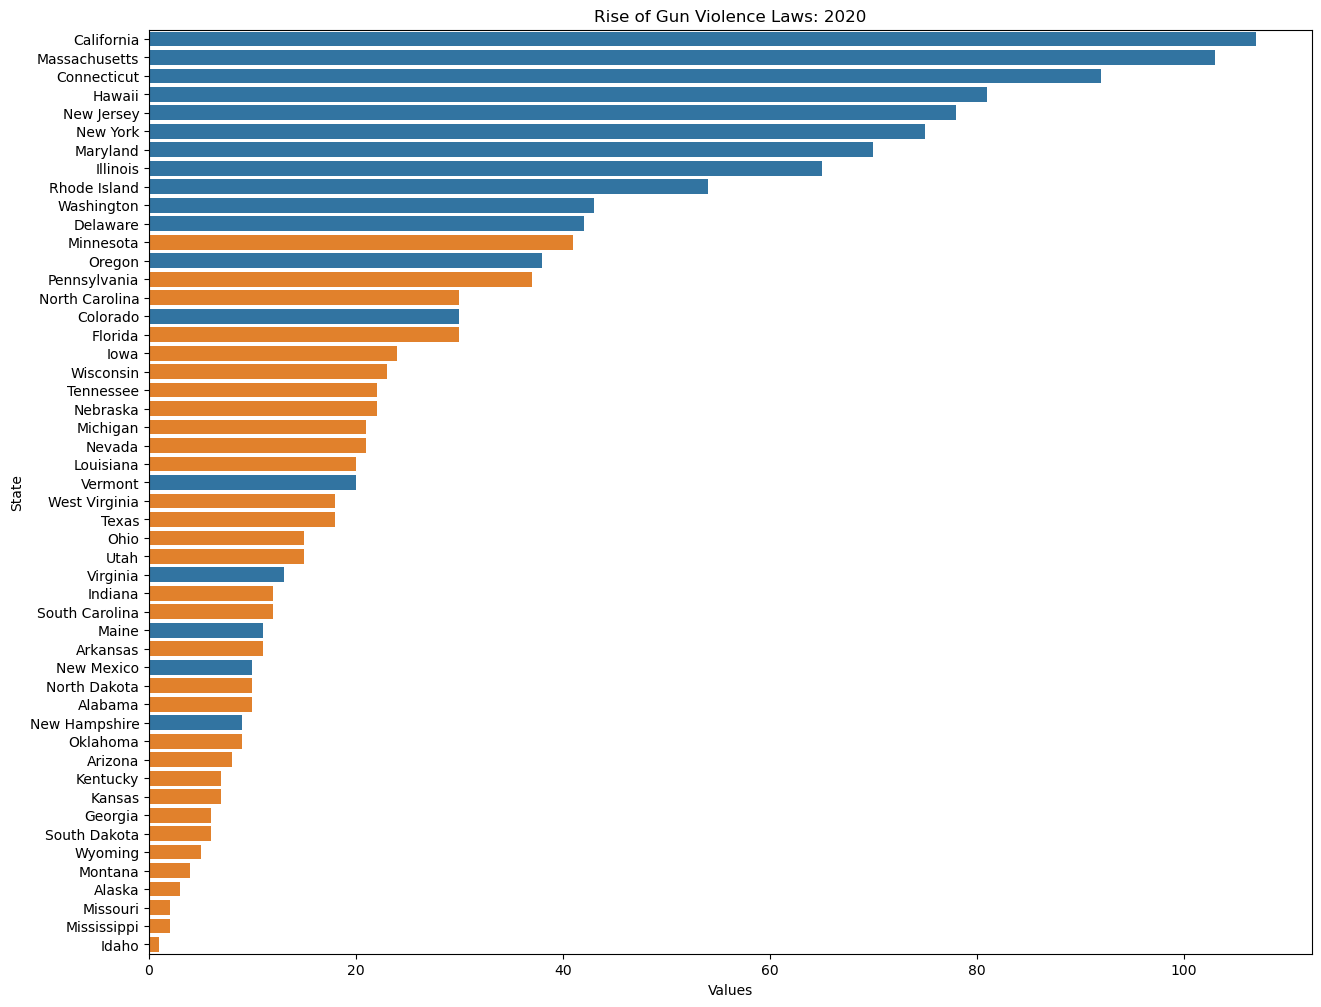

In [164]:
# Plotting using Seaborn
plt.figure(figsize=(15, 12))
sns.barplot(y='State', x='Values', data=df_grouped,palette=colors)
plt.title('Rise of Gun Violence Laws: 2020')
plt.show()

In [ ]:
con.commit()
con.close()